Nama: Fernaldy Ferdinand

NIM: 2602068605

Link Video: https://binusianorg-my.sharepoint.com/personal/fernaldy_ferdinand_binus_ac_id/_layouts/15/guestaccess.aspx?share=Ehfll6SHUSFMh_qrjFnFBqYBWZegsbExpeJy6z6KxyTG0Q&e=NM5lfA

In [1]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep

Simpan url video YT

In [111]:
url_video = [
    "https://www.youtube.com/watch?v=71IoFn3Q2hs",
    "https://www.youtube.com/watch?v=1BmayjFMKGc",
    "https://www.youtube.com/watch?v=8Kb3xfYXkZE",
    "https://www.youtube.com/watch?v=rtgmPgnE1_E"
]

In [140]:
Driver = webdriver.Chrome()
Driver.set_page_load_timeout(10)
Driver.maximize_window()

Comments = []

Menggunakan Selenium WebDriver untuk mengotomatisasi browser Chrome. Lalu memberikan waktu tunggu 10 detik untuk memuat halaman youtube dgn set_page_load_timeout(). Memperbesar ukuran jendela dengan maximize_window(). Membuat list kosong yaitu Comments untuk menyimpan data komentar yg diambil dari komentar youtube.

In [141]:
for url in url_video:
    Driver.get(url)
    sleep(5)
    for _ in range(20):
        Driver.execute_script("window.scrollBy(0,500)")
        sleep(2)
    Comment = Driver.find_elements(By.XPATH, '//*[@id="content-text"]')
    yt_comment = [comment.text for comment in Comment]
    Comments.extend(yt_comment)
    sleep(5)

Melakukan iterasi setiap link YT, memberi waktu selama 5 detik untuk memuat yt. Halaman di scroll ke bawah 20x untuk memuat lebih banyak komentar. Menggambil komentar menggunakan XPath dan disimpan kedalam list yt_commen, yang kemudoiam ditambahkan kedalam list Comments.

In [142]:
import pandas as pd
data = pd.DataFrame({"Comment": Comments})
data.to_csv("Comments_Youtube.csv", index=False)
print(f"Total Comments Scaraped: {len(Comments)}")
Driver.close()

Total Comments Scaraped: 130


Membuat DataFrame dari list Comments, dengan kolom 'Comment' dan menyimpan DataFramenya kedalam file CSV. Lalu melihat jumlah total komentar yang telah diambil, dan menutup browser yang telah dibuka.

In [143]:
df = data

In [144]:
df.head()

Comment
0  menurut saya, Potensi pasar digital Indonesia ...
1  Berbicara tentang tranformasi digital di Indon...
2  Transformasi digital di Indonesia tidak hanya ...
3  Menurut analisa saya terkait video ini yaitu p...
4  Transformasi digital sangat penting bagi perus...

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  130 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [146]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [147]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [148]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fernaldy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Clean Text

In [149]:
def Clean (text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

In [150]:
df['Clean_text'] = df['Comment'].apply(Clean)

Menghapus atau membersihkan data dari karakter non-alfabet (seperti angka dan tanda baca) dan mengubah semua huruf menjadi huruf kecil. Dan membuat kolom baru 'Clean_text' yang menyimpan hasil dari penerapan fungsi Clean pada kolom 'Comment'

Tokenize

In [151]:
def Tokenize (text):
    return word_tokenize(text)

In [152]:
df['Tokenize_text'] = df['Clean_text'].apply(Tokenize)

Membuat fungsi untuk membagikan teks menjadi kata - kata (tokens) dan membuat kolom baru 'Tokenize_text' yang menyimpan hasil dari implementasi fungsi Tokenize pada kolom 'Clean_text'

StopWord

In [153]:
def Stopword(tokens):
    Stop_word = set(stopwords.words('indonesian'))
    return [Word for Word in tokens if Word not in Stop_word]

In [154]:
df["Tokenize_text"] = df['Tokenize_text'].apply(Stopword)

Membuat fungsi untuk menghapus kata - kata yang termasuk dalam stopwords bahasa indonesia yg menggunakan daftar stopwords. Dan mengimplementasikan fungsi Stopword pada kolom 'Tokenize_text'

Lemmatization

In [155]:
def Lemmatize(tokens):
    Lemmatizer = WordNetLemmatizer()
    return[Lemmatizer.lemmatize(Word) for Word in tokens]

In [156]:
df['Lemmatize_text'] = df["Tokenize_text"].apply(Lemmatize)

 Membuat fungsi untuk mengubah kata menjadi bentuk dasarnya.Dan membuat kolom baru 'Lemmatize_text' yang menyimpan hasil dari implementasi fungsi Lemmatize pada kolom 'Tokenize_text'

In [157]:
df.head()

Comment  \
0  menurut saya, Potensi pasar digital Indonesia ...   
1  Berbicara tentang tranformasi digital di Indon...   
2  Transformasi digital di Indonesia tidak hanya ...   
3  Menurut analisa saya terkait video ini yaitu p...   
4  Transformasi digital sangat penting bagi perus...   

                                          Clean_text  \
0  menurut saya potensi pasar digital indonesia y...   
1  berbicara tentang tranformasi digital di indon...   
2  transformasi digital di indonesia tidak hanya ...   
3  menurut analisa saya terkait video ini yaitu p...   
4  transformasi digital sangat penting bagi perus...   

                                       Tokenize_text  \
0  [potensi, pasar, digital, indonesia, mendorong...   
1  [berbicara, tranformasi, digital, indonesia, t...   
2  [transformasi, digital, indonesia, teknologi, ...   
3  [analisa, terkait, video, perkembangan, transf...   
4  [transformasi, digital, perusahaan, bisnis, be...   

                                      Lemmatize_text  
0  [potensi, pasar, digital, indonesia, mendorong...  
1  [berbicara, tranformasi, digital, indonesia, t...  
2  [transformasi, digital, indonesia, teknologi, ...  
3  [analisa, terkait, video, perkembangan, transf...  
4  [transformasi, digital, perusahaan, bisnis, be...

In [158]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

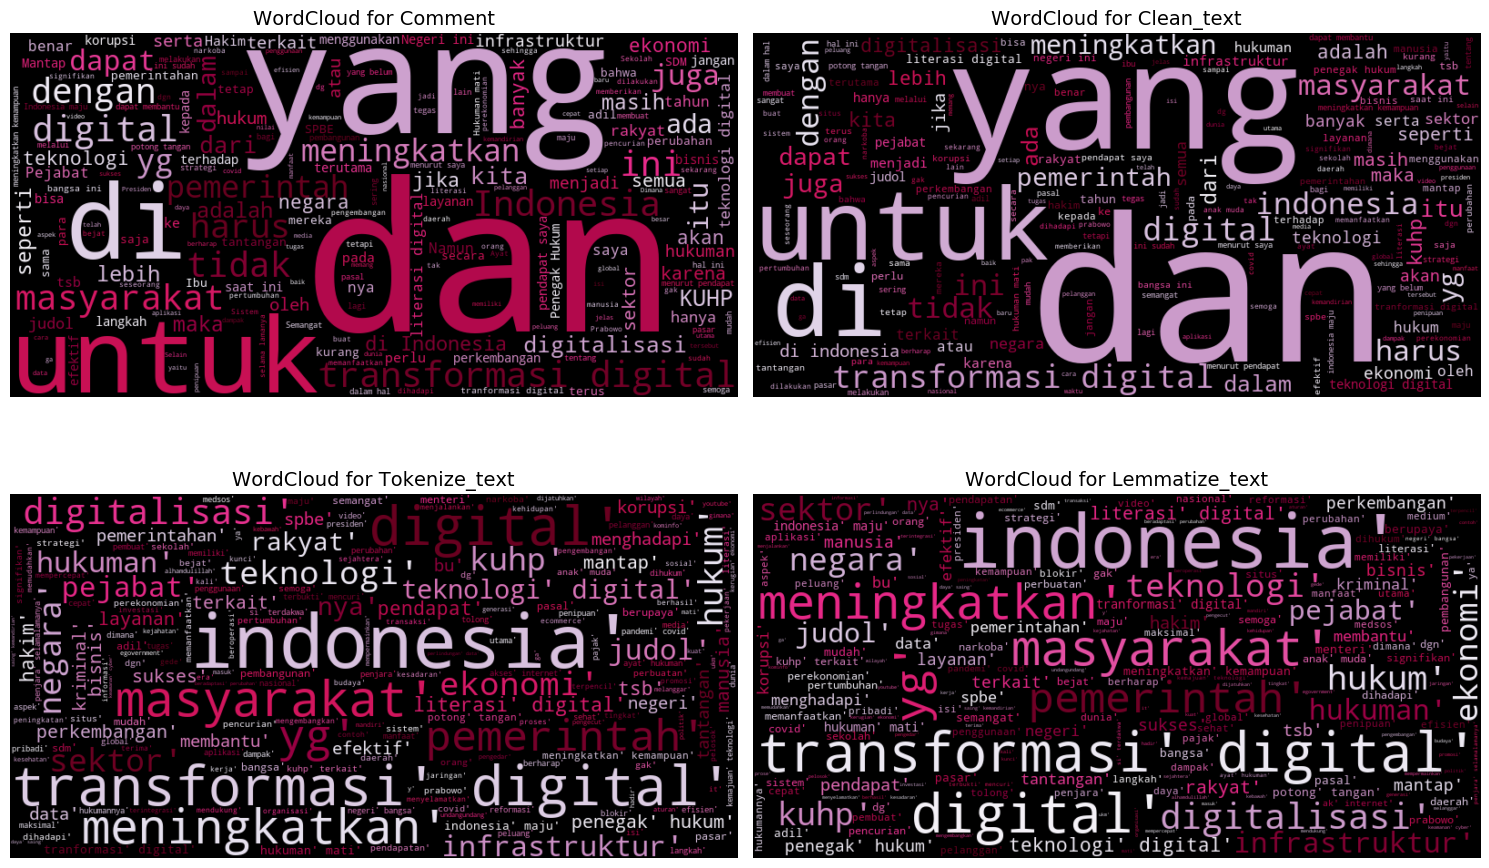

In [160]:
columns = ['Comment', 'Clean_text', 'Tokenize_text', 'Lemmatize_text']

# Loop untuk membuat WordCloud dari setiap kolom
plt.figure(figsize=(15, 10))  # Ukuran figure untuk semua WordCloud
for i, column in enumerate(columns, 1):
    # Gabungkan teks dalam kolom, pastikan mengabaikan NaN
    texts = ' '.join(df[column].dropna().astype(str))
    
    # Membuat WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap="PuRd",
        contour_color="white"
    ).generate(texts)
    
    # Menampilkan WordCloud
    plt.subplot(2, 2, i)  # Menampilkan 4 WordCloud dalam grid 2x2
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {column}", fontsize=14)

# Menampilkan semua WordCloud
plt.tight_layout()
plt.show()

Membuat WordCloud untuk memperlihatkan kata - kata yang paling sering muncul. Jika semakin besar, maka kata tersebut sering muncul.

Text Representation

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
df['Lemmatize_text'] = df['Lemmatize_text'].apply(lambda x: ' '.join(x))

# TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Lemmatize_text'])

# CountVectorizer Representation
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['Lemmatize_text'])

Menggubah list token menjadi string teks dgn menggabungkan token - token tersebut menjadi satu kalimat yg terpisahkan oleh spasi.

Mengimplementasikan representasi teks TF-IDF dan CountVectorizer untuk pembelajaran mesin

TF-IDF: Merepresentasikan setiap dokumen dalam bentuk vektor numerik berdasarkan frekuensi kata yang relevan.

CountVectorizer: Merepresentasikan setiap dokumen berdasarkan frekuensi kemunculan kata.

In [162]:
print("TF-IDF Shape:", tfidf_matrix.shape)
print("CountVectorizer:", count_matrix.shape)

TF-IDF Shape: (130, 1074)
CountVectorizer: (130, 1074)


In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menyusun jumlah cluster yg akan diuji dari 2 hingga 10.

In [164]:
tfidf_silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, kmeans.labels_)
    tfidf_silhouette_scores.append((k, score))
    print(f"TF-IDF -> k={k}, Silhouette Score = {score:.4f}")

TF-IDF -> k=2, Silhouette Score = 0.0346
TF-IDF -> k=3, Silhouette Score = 0.0494
TF-IDF -> k=4, Silhouette Score = 0.0376
TF-IDF -> k=5, Silhouette Score = 0.0359
TF-IDF -> k=6, Silhouette Score = 0.0466
TF-IDF -> k=7, Silhouette Score = 0.0502
TF-IDF -> k=8, Silhouette Score = 0.0410
TF-IDF -> k=9, Silhouette Score = 0.0616


In [165]:
count_vec_silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(count_matrix)
    score = silhouette_score(count_matrix, kmeans.labels_)
    count_vec_silhouette_scores.append((k, score))
    print(f"CountVectorizer -> k={k}, Silhouette Score = {score:.4f}")

CountVectorizer -> k=2, Silhouette Score = 0.8411
CountVectorizer -> k=3, Silhouette Score = 0.5236
CountVectorizer -> k=4, Silhouette Score = 0.5336
CountVectorizer -> k=5, Silhouette Score = 0.5000
CountVectorizer -> k=6, Silhouette Score = 0.4840
CountVectorizer -> k=7, Silhouette Score = 0.4877
CountVectorizer -> k=8, Silhouette Score = 0.4847
CountVectorizer -> k=9, Silhouette Score = 0.4489


Membuat list kosong untuk menyimpan nilai silhouette score yang dihitung berdasarkan representasi dari TF-IDF dan CountVectorizer. Melakukan iterasi untuk nilai k dimulai dari 2 hingga 9. Melakukan training model K-Means menggunakan matriks dari kedua text representation yg telah dihitung. Menghitung nilai Silhouette Score untuk model K-Means yang telah dilatih. Nilai ini mengukur seberapa baik pemisahan antar cluster, dengan skor yang lebih tinggi menunjukkan clustering yang lebih baik.

In [169]:
# Ekstraksi nilai k dan skor untuk visualisasi
k_tfidf, scores_tfidf = zip(*tfidf_silhouette_scores)
k_count, scores_count = zip(*count_vec_silhouette_scores)

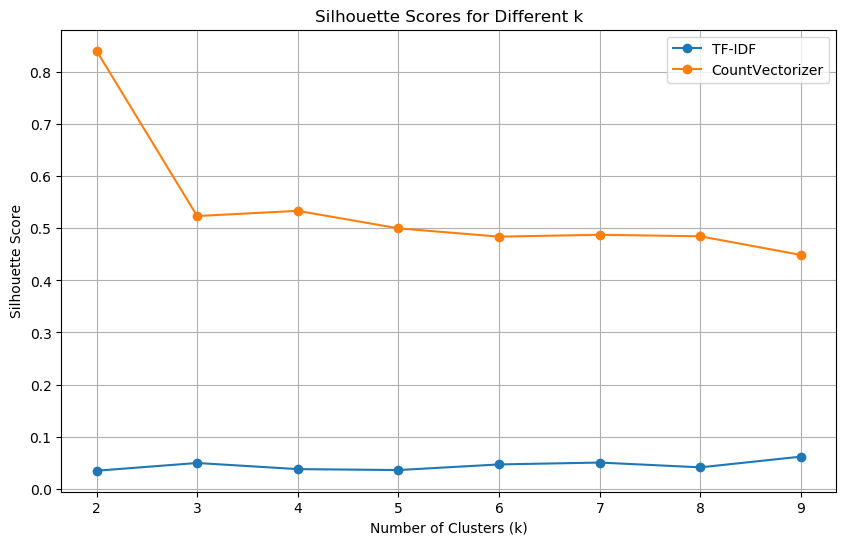

In [171]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(k_tfidf, scores_tfidf, marker='o', label='TF-IDF')
plt.plot(k_count, scores_count, marker='o', label='CountVectorizer')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

In [170]:
# Menentukan k terbaik berdasarkan silhouette score
best_k_tfidf = k_tfidf[scores_tfidf.index(max(scores_tfidf))]
best_k_count = k_count[scores_count.index(max(scores_count))]

print(f"Best k for TF-IDF: {best_k_tfidf}, Silhouette Score: {max(scores_tfidf):.4f}")
print(f"Best k for CountVectorizer: {best_k_count}, Silhouette Score: {max(scores_count):.4f}")

Best k for TF-IDF: 9, Silhouette Score: 0.0616
Best k for CountVectorizer: 2, Silhouette Score: 0.8411


In [172]:
from sklearn.decomposition import LatentDirichletAllocation

# Latent Dirichlet Allocation (LDA) untuk TF-IDF
lda_tfidf = LatentDirichletAllocation(n_components=best_k_tfidf, random_state=42)
lda_tfidf.fit(tfidf_matrix)

# Latent Dirichlet Allocation (LDA) untuk CountVectorizer
lda_count = LatentDirichletAllocation(n_components=best_k_count, random_state=42)
lda_count.fit(count_matrix)

# Fungsi untuk menampilkan topik
def display_topics(model, vectorizer, no_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Menampilkan topik dari TF-IDF
print("Topics from TF-IDF:")
display_topics(lda_tfidf, tfidf_vectorizer, 10)

# Menampilkan topik dari CountVectorizer
print("\nTopics from CountVectorizer:")
display_topics(lda_count, count_vectorizer, 10)


Topics from TF-IDF:
Topic 1:
mantap, sophisticated, manusia, buaya, menjaddi, mudahan, ilmu, red, green, turn
Topic 2:
sukses, spbe, maju, sinergi, indonesia, bismillah, digital, teknologi, sumenep, jaringan
Topic 3:
digital, okee, meningkatkan, pelayanan, indonesia, transformasi, mantap, tolong, digitalisasi, menteri
Topic 4:
httpsyoutubeytawjcsiiepgftegmaxrnx, judol, semangat, digital, gimana, kolaborasi, pajak, hukum, sepi, gmnko
Topic 5:
digital, transformasi, mantap, indonesia, meningkatkan, ngurusin, berisin, yg, medsos, video
Topic 6:
mantap, bahan, baju, sekolah, indonesia, berkarya, ukm, digital, pionir, muda
Topic 7:
digital, bangga, masyarakat, komindigi, bravo, kreatif, kemenpanrb, tranformasi, muda, anak
Topic 8:
maju, indonesia, keren, digital, semoga, program, pasar, transformasi, yg, bagus
Topic 9:
indonesiaterintegrasi, silakan, judol, kuhp, blokir, langkah, digital, you, love, terintegrasi

Topics from CountVectorizer:
Topic 1:
digital, indonesia, transformasi, hukuma

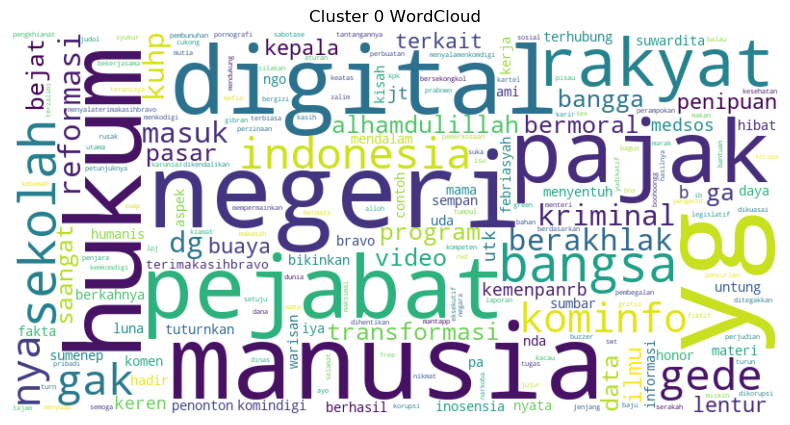

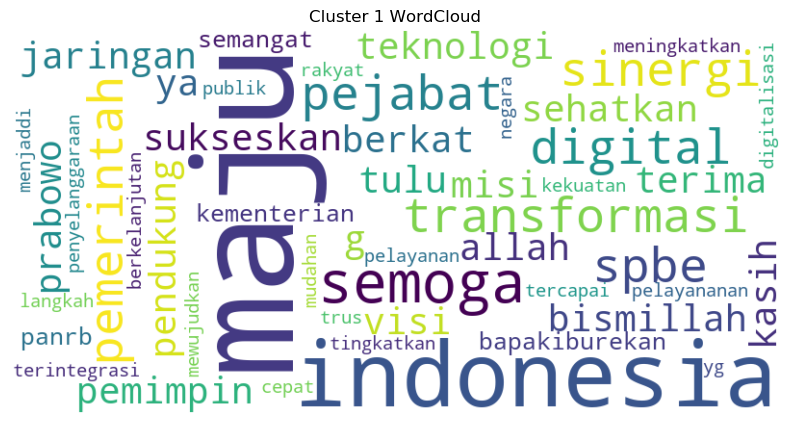

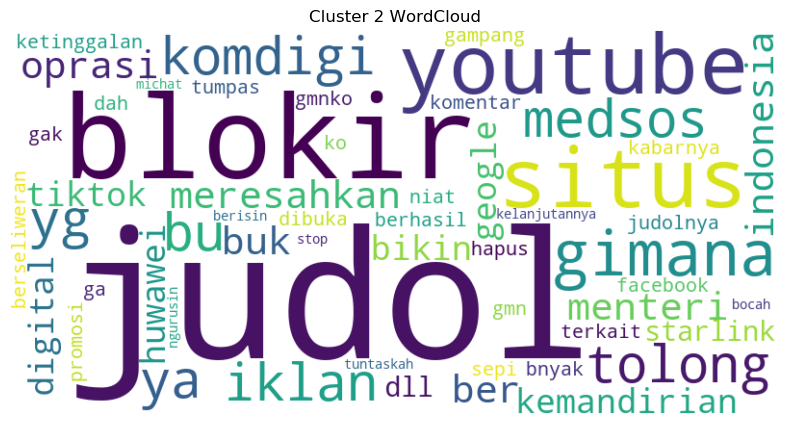

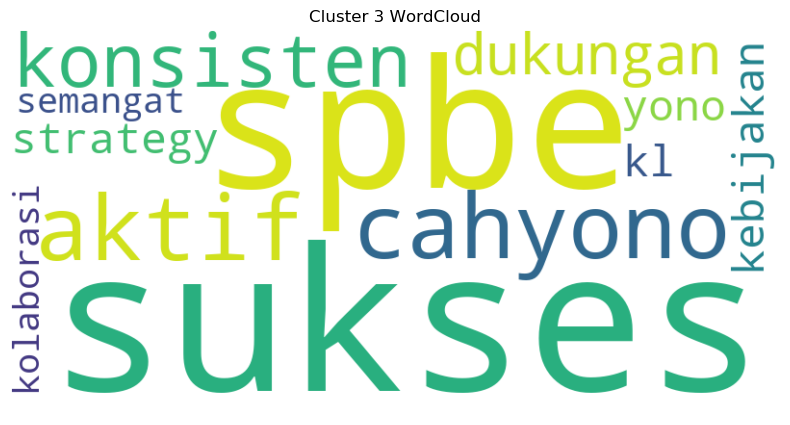

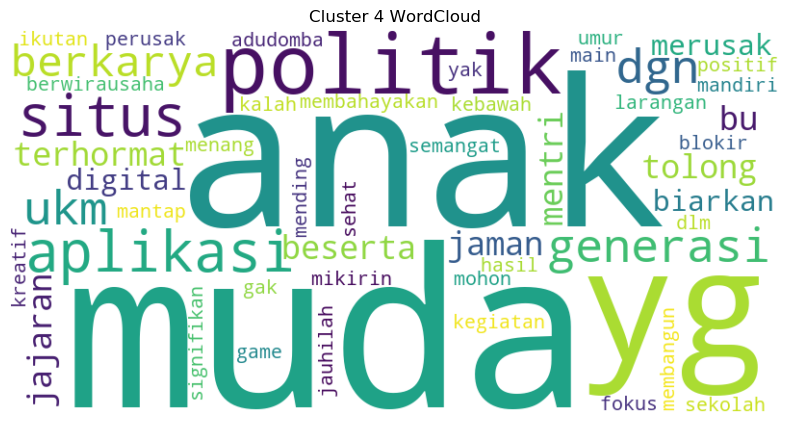

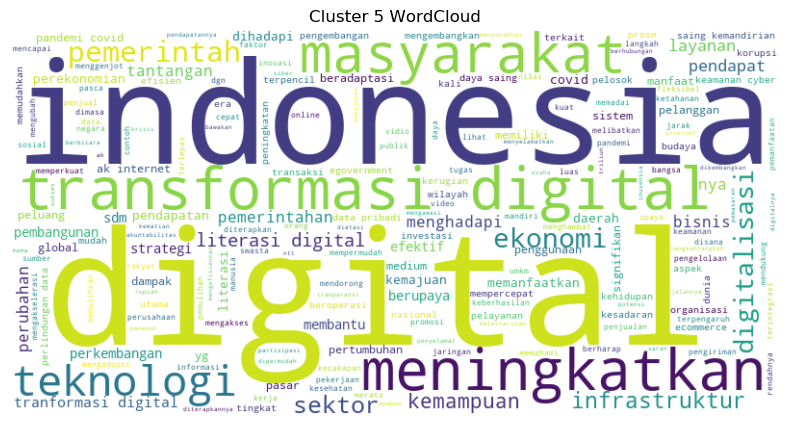

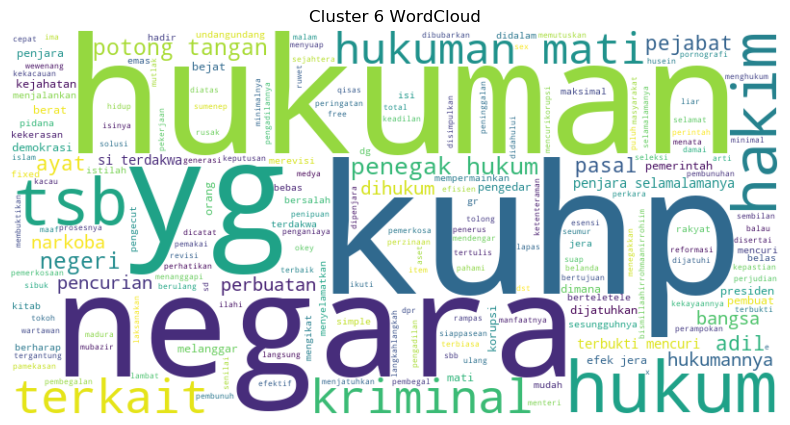

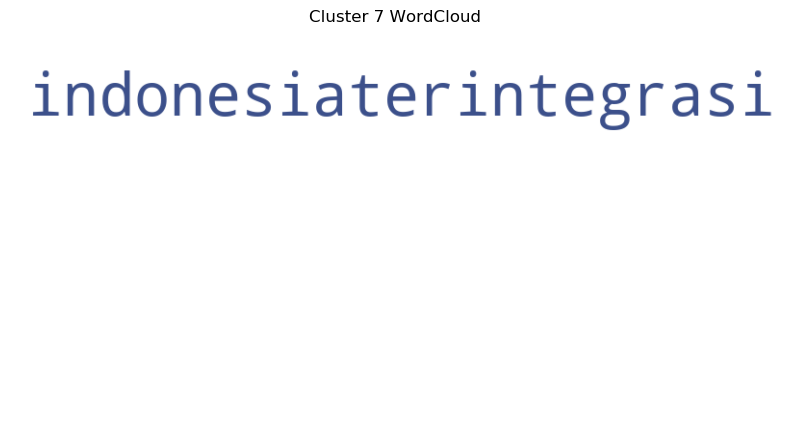

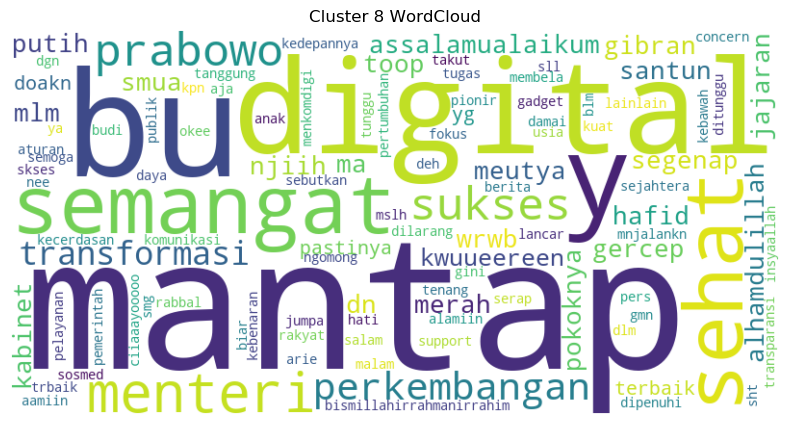

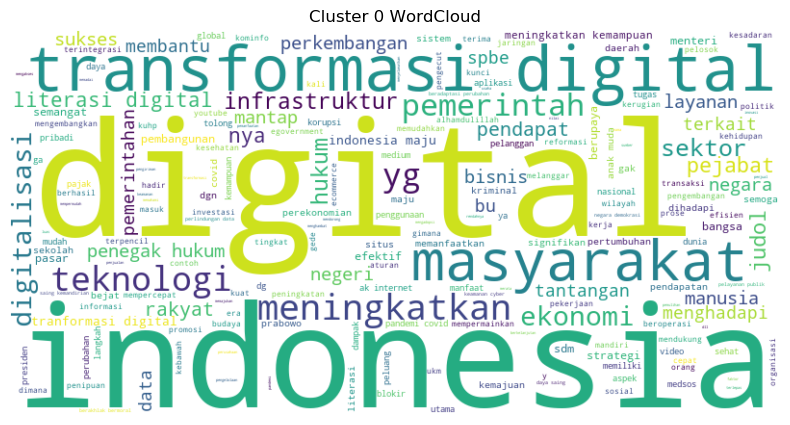

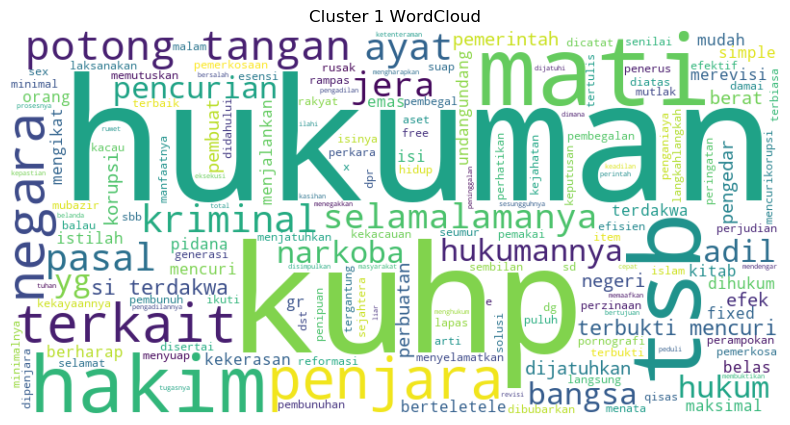

In [174]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(matrix, clusters, column_name, vectorizer):
    for cluster_num in range(max(clusters) + 1):
        cluster_indices = [i for i, label in enumerate(clusters) if label == cluster_num]
        cluster_texts = ' '.join(df[column_name].iloc[cluster_indices])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {cluster_num} WordCloud')
        plt.show()

# Persona analysis untuk TF-IDF Clustering
kmeans_tfidf = KMeans(n_clusters=best_k_tfidf, random_state=42).fit(tfidf_matrix)
create_wordcloud(tfidf_matrix, kmeans_tfidf.labels_, 'Lemmatize_text', tfidf_vectorizer)

# Persona analysis untuk CountVectorizer Clustering
kmeans_count = KMeans(n_clusters=best_k_count, random_state=42).fit(count_matrix)
create_wordcloud(count_matrix, kmeans_count.labels_, 'Lemmatize_text', count_vectorizer)

Persona Analysis
Topics from TF-IDF
Topic 1:

Kata-kata dominan: "mantap, sophisticated, manusia, buaya, ilmu"

Persona:
Pengguna yang mengapresiasi teknologi dengan sentimen positif, namun ada noise seperti "buaya".
Mungkin ada komentar spam atau tidak relevan.

Topic 2:

Kata-kata dominan: "sukses, spbe, maju, sinergi, indonesia"

Persona:
Optimisme terhadap transformasi digital, terutama terkait sinergi antar pihak di Indonesia.

Topic 3:

Kata-kata dominan: "digital, meningkatkan, pelayanan, transformasi"

Persona:
Fokus pada perbaikan layanan publik melalui digitalisasi.

Topic 4:

Kata-kata dominan: "httpsyoutubeytawjcsiiepgftegmaxrnx, pajak, hukum, gmnko"

Persona:
Ada banyak noise (tautan, istilah acak), mungkin menunjukkan komentar spam atau outlier.

Topic 5:

Kata-kata dominan: "digital, transformasi, medsos, video"

Persona:
Fokus pada media sosial dan konten video sebagai bagian dari transformasi digital.

Topic 6:

Kata-kata dominan: "baju, sekolah, ukm, pionir, muda"

Persona:
Komunitas muda yang mendukung UKM dan pendidikan dalam digitalisasi.

Topic 7:

Kata-kata dominan: "bangga, masyarakat, bravo, kreatif, tranformasi"

Persona:
Dukungan penuh terhadap inisiatif transformasi digital dari masyarakat kreatif.

Topic 8:

Kata-kata dominan: "program, pasar, transformasi, bagus"

Persona:
Fokus pada digitalisasi pasar dan program transformasi digital.

Topic 9:

Kata-kata dominan: "indonesiaterintegrasi, kuhp, blokir, langkah"

Persona:
Kritik terhadap kebijakan digitalisasi terkait hukum dan regulasi.

Topics from CountVectorizer

Topic 1:
Kata-kata dominan: "digital, indonesia, transformasi, masyarakat, pemerintah"

Persona:
Dukungan terhadap transformasi digital untuk masyarakat dan peran pemerintah.

Topic 2:
Kata-kata dominan: "digital, meningkatkan, teknologi, infrastruktur"

Persona:
Fokus pada infrastruktur teknologi untuk meningkatkan kualitas hidup.

Perbandingan Clustering vs Topic Extraction

Pendekatan

Clustering
Mengelompokkan komentar berdasarkan pola data

Topic Extraction
Mengidentifikasi tema spesifik dalam komentar

Output

Clustering
3-10 cluster berdasarkan representasi teks

Topic Extraction
9 topik (TF-IDF) dan 2 topik (CountVectorizer)

Hasil	

Clustering
Cluster lebih fokus pada pola sentimen atau persona pengguna	

Topic Extraction
Topik lebih fokus pada tema spesifik seperti "infrastruktur", "pemerintah", "media sosial".

Insight Utama	

Clustering
Mengelompokkan pengguna menjadi kelompok seperti "pendukung", "kritikus", "netral"	

Topic Extraction
Menggali isu utama seperti "hukum", "pendidikan", dan "pasar digital".

Kelebihan	

Clustering
Lebih baik untuk segmentasi pengguna	

Topic Extraction
Lebih baik untuk analisis mendalam dari konten

Kekurangan	

Clustering
Tidak mendeteksi detail tema spesifik	

Topic Extraction
Tidak membedakan sentimen dalam tema yang sama